# Бойко Виктория Владимировна

Лабораторная работа №2. Нормы векторов и матриц, решение переопределенной системы линейных уравнений, решение системы линейных уравнений с помощью LU разложения. 

№ 3

In [88]:
import numpy as np
from matplotlib import pyplot as plt

1. Создать квадратную матрицу из случайных целых чисел из $[-5,2]$ размера $11$. Найти и 
вычислить минор 5 порядка, расположенный на пересечении $1,2,3,6,7$ строк и $7,8,9, 10,11$ 
столбцов. Использовать срезы матрицы

In [89]:
matrix1 = np.random.randint(-5, 3, size=(11, 11))
print("matrix:")
print(matrix1)

index = list(range(11))
minor1 = matrix1[index[:3]+index[5:7]][:,index[6:]]
print("\nminor:")
print(minor1)

determinant = np.linalg.det(minor1)

print("\ndeterminant:")
print(determinant)


matrix:
[[-3 -1 -3 -3 -5 -4  2 -3  1  0 -5]
 [ 1 -1 -5 -1 -3 -3 -2 -1  0  2  2]
 [-5 -4 -4 -3 -4 -4 -5 -4  0  2 -1]
 [ 1  2 -1  2 -4 -2 -2 -3  1 -1  2]
 [ 1  2  2  0 -2 -2  0 -2 -4  2  0]
 [ 0 -5 -5  2 -3 -1 -3  1 -1 -5  1]
 [-4 -5  0 -1 -1 -1 -4 -2 -2 -1 -2]
 [-3  0  2 -4  1  2 -5  0  0  0 -1]
 [-1  0 -5  2 -3 -3  1 -2  0 -3  2]
 [-3 -2 -3 -4  2  2  2 -4 -5  0 -2]
 [-4 -2 -2  1 -2 -2  2  2  0 -5  1]]

minor:
[[ 2 -3  1  0 -5]
 [-2 -1  0  2  2]
 [-5 -4  0  2 -1]
 [-3  1 -1 -5  1]
 [-4 -2 -2 -1 -2]]

determinant:
-224.9999999999998


2. Создать вектор-строку $1\times8$ из случайных целых чисел. Вычислить норму $\| x \|_\infty$ самостоятельно написанной функцией и проверить результат с помощью linalg.norm() в Python.


In [90]:
def my_norm(v):
    return max(abs(i) for i in v)

vector = np.random.randint(-100, 100, size=(8))

norm2 = my_norm(vector)
norm_numpy2 = np.linalg.norm(vector, ord=np.inf)

print(vector)
print("norm:", norm2)
print("correct:", norm2==norm_numpy2)


[ 77   6 -81  85  70 -56  81  -1]
norm: 85
correct: True


3. Создать матрицу из случайных целых чисел. Найти фробениусову норму матрицы с помощью самостоятельно написанного алгоритма, проверить результат с помощью linalg.norm() в Python. 

In [91]:
def my_frobenius_norm(matrix):
    return np.sqrt(np.sum(matrix**2))


matrix3 = np.random.randint(-10, 10, size=(3, 4))  # Пример: матрица 3x4

print("matrix:")
print(matrix3)

norm3 = my_frobenius_norm(matrix3)
norm3_numpy = np.linalg.norm(matrix3, 'fro')

print("Frobenius norm:", norm3)
print("correct:", norm3==norm3_numpy)

matrix:
[[ 7 -1 -8  5]
 [ 2 -8  7  6]
 [ 0  9 -3  3]]
Frobenius norm: 19.77371993328519
correct: True


4. Найти псевдорешение системы
\begin{cases}
    5.7x_1 - 7.7x_2 - 5.6x_3 = 2.7 \\
    6.6x_1 + 13.1x_2 - 6.3x_3 = -5.5 \\    
    14.7x_1 - 2.8x_2 + 5.6x_3 = 8.6 \\
    8.5x_1 + 12.7x_2 - 23.7x_3 = 14.7
  \end{cases}

In [92]:
# X = (A_t * A)^(-1) * A_t * B
def my_pinv(matrix):
    A_T = matrix.T
    A_T_A = np.dot(A_T, matrix)
    A_T_A_inv = np.linalg.inv(A_T_A)
    return np.dot(A_T_A_inv, A_T)


A4 = np.array([
    [5.7, -7.7, -5.6],
    [6.6, 13.1, -6.3],
    [14.7, -2.8, 5.6],
    [8.5, 12.7, -23.7]
])

B4 = np.array([2.7, -5.5, 8.6, 14.7])

A_pinv = my_pinv(A4)
answer4 = np.dot(A_pinv, B4)

A_pinv_numpy = np.linalg.pinv(A4)
answer4_numpy = np.dot(A_pinv_numpy, B4)

print("answer:", answer4)
print("correct:", np.allclose(answer4, answer4_numpy))

answer: [ 0.49097011 -0.40036963 -0.49493758]
correct: True


5. Даны пять точек $(30; 17), (40; 22), (50; 40), (60, 37), (70, 29)$. Найти уравнение наиболее выгодной траектории. Построить график.

C:\Users\Вика\AppData\Local\Temp\ipykernel_5708\4141303411.py:13: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(x, y, 40, 'g', 'o', alpha=0.8, label='Точки')


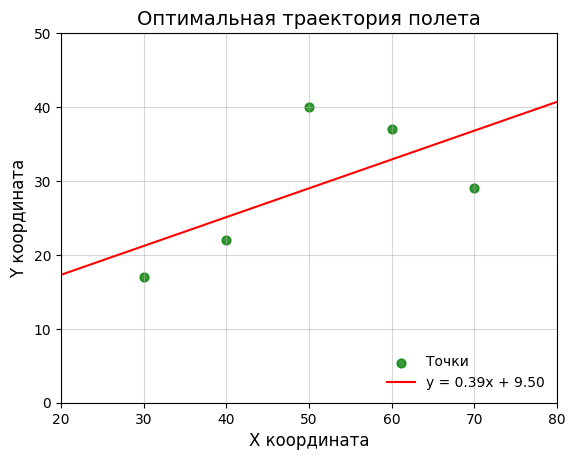

In [98]:
x = [30, 40, 50, 60, 70]
y = [17, 22, 40, 37, 29]

x_min = min(x)-10
x_max = max(x)+10
y_max = max(y)+10

A = np.array([[i, 1] for i in x])
k, b = np.dot(my_pinv(A), y)

plt.xlim(x_min,x_max)
plt.ylim(0, y_max)
plt.scatter(x, y, 40, 'g', 'o', alpha=0.8, label='Точки')
x_line = np.array([x_min, x_max])
y_line = k*x_line + b
plt.plot(x_line, y_line, 'r', label=f'y = {k:.2f}x + {b:.2f}')

plt.title('Оптимальная траектория полета', fontsize=14)
plt.xlabel('X координата', fontsize=12)
plt.ylabel('Y координата', fontsize=12)
plt.grid(alpha=0.5)
plt.legend(loc='lower right', frameon=False)
plt.show()



6. Создать произвольную верхнюю унитреугольную матрицу $А$ 5 порядка, вектор $B$ произвольный. Решить систему $AX = B$. 

In [ ]:
# Алгоритм обратой подстановки (начинаем с последнего уравнения и движемся вверх, подставляя уже найденные значения)
def backward_substitution(A, B):
    n = len(B)
    X = np.zeros(n)
    for i in range(n-1, -1, -1):
        X[i] = (B[i] - np.dot(A[i, i+1:], X[i+1:])) / A[i, i]
    return X


A6 = np.triu(np.random.rand(5, 5))
np.fill_diagonal(A6, 1)
B6 = np.random.rand(5)

answer6 = backward_substitution(A6, B6)
answer6_numpy= np.linalg.solve(A6, B6)

print("matrix A: ")
print(A6)
print("\nvector B:")
print(B6)
print("\nanswer:", answer6)
print("correct:", np.allclose(answer6, answer6_numpy))

matrix A: 
[[1.         0.11053367 0.24984008 0.95854869 0.36624127]
 [0.         1.         0.34707107 0.47748613 0.70538287]
 [0.         0.         1.         0.56864272 0.62522514]
 [0.         0.         0.         1.         0.79149949]
 [0.         0.         0.         0.         1.        ]]

vector B:
[0.84111164 0.28291765 0.97627361 0.09801215 0.89439287]

answer: [ 0.94289391 -0.32187792  0.76389153 -0.60989935  0.89439287]
correct: True


7. Решить систему, используя $LU$ разложение матрицы. $LU$ разложение должно быть найдено самостоятельно написанной функцией, полученные матрицы выведены на экран.
Придерживаться плана решения, приведенного в пособии! 
Решение системы должно быть проверено встроенной функцией Python.
\begin{cases}
    5.7x_1 - 7.8x_2 - 5.6x_3 - 8.3x_4 = 2.7 \\
    6.6x_1 + 13.1x_2 - 6.3x_3 + 4.3x_4 = -5.5 \\    
    14.7x_1 - 2.8x_2 + 5.6x_3 - 12.1x_4 = 8.6 \\
    8.5x_1 + 12.7x_2 - 23.7x_3 + 5.7x_4 = 14.7
  \end{cases}

In [95]:
def lu_decomposition(A):
    n = len(A)
    L = np.eye(n)
    U = A.copy()
    for k in range(n-1):
        for i in range(k+1, n):
            L[i, k] = U[i, k] / U[k, k]
            U[i, k:] -= L[i, k] * U[k, k:]
    return L, U


def forward_substitution(L, b):
    n = len(b)
    y = np.zeros(n)
    for i in range(n):
        y[i] = (b[i] - np.dot(L[i, :i], y[:i])) / L[i, i]
    return y


A7 = np.array([
    [5.7, -7.8, -5.6, -8.3],
    [6.6, 13.1, -6.3, 4.3],
    [14.7, -2.8, 5.6, -12.1],
    [8.5, 12.7, -23.7, 5.7]
])
B7 = np.array([2.7, -5.5, 8.6, 14.7])

L, U = lu_decomposition(A7)

print("Матрица L:")
print(L)
print("\nМатрица U:")
print(U)

print("\nПроверка LU-разложения (A7 == L * U):")
print(np.allclose(A7, np.dot(L, U)))

y = forward_substitution(L, B7)
print("\nВектор y (решение системы Ly = B7):")
print(y)

X = backward_substitution(U, y)
print("\nРешение X (решение системы UX = y):")
print(X)

X_check = np.linalg.solve(A7, B7)
print("\nПроверка решения (X == X_check):")
print(np.allclose(X, X_check))

Матрица L:
[[ 1.          0.          0.          0.        ]
 [ 1.15789474  1.          0.          0.        ]
 [ 2.57894737  0.7824019   1.          0.        ]
 [ 1.49122807  1.09940547 -0.78156908  1.        ]]

Матрица U:
[[ 5.70000000e+00 -7.80000000e+00 -5.60000000e+00 -8.30000000e+00]
 [ 0.00000000e+00  2.21315789e+01  1.84210526e-01  1.39105263e+01]
 [ 1.77635684e-15  0.00000000e+00  1.98979786e+01 -1.57835910e+00]
 [ 0.00000000e+00  0.00000000e+00  1.77635684e-15  1.55028759e+00]]

Проверка LU-разложения (A7 == L * U):
True

Вектор y (решение системы Ly = B7):
[ 2.7        -8.62631579  8.38608799 26.71181007]

Решение X (решение системы UX = y):
[ 11.94661496 -11.23450224   1.78820056  17.23022887]

Проверка решения (X == X_check):
True
